Number of components to explain 50.0% variance: 2
Number of component choosen  =  2


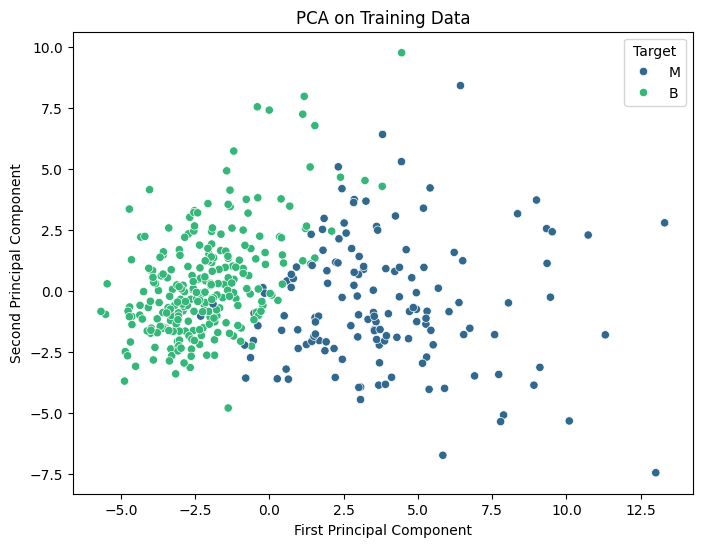




Confusion Matrix: 
 [[100   2]
 [  7  62]]
Accuracy:  94.73684210526315
Report: 
               precision    recall  f1-score   support

           B       0.93      0.98      0.96       102
           M       0.97      0.90      0.93        69

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



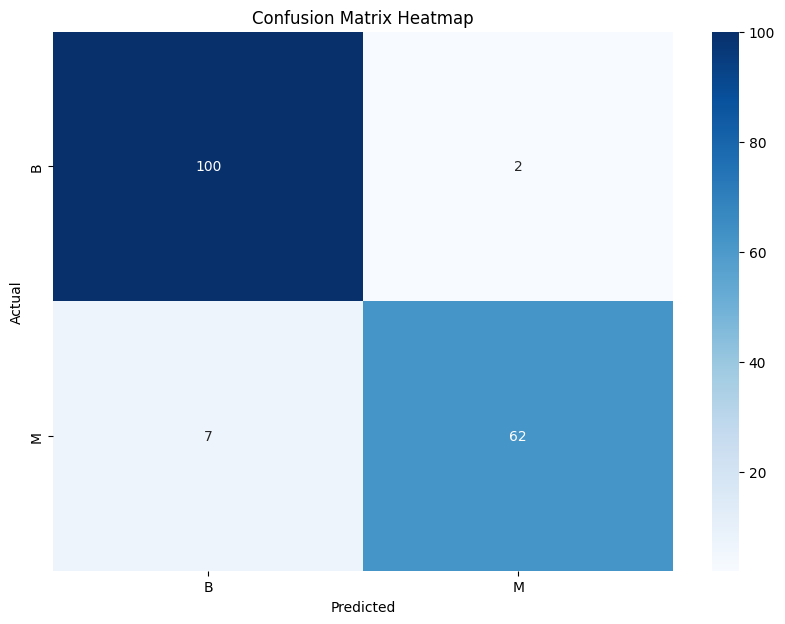

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Function to import data
def importdata():
    balance_data = pd.read_csv(r'C:\Users\ravi\Desktop\ML Algorithms\Datasets\data4.csv', sep=',', header=None)
    return balance_data

# Function to split the dataset into features and target variables
def splitdataset(balance_data):
    # Separating the target variable
    X = balance_data.values[:, 2:]
    Y = balance_data.values[:, 1]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    return X_train, X_test, y_train, y_test

# Import the data
balance_data = importdata()

# Split the dataset
X_train, X_test, y_train, y_test = splitdataset(balance_data)

# Convert to DataFrame for easier handling of NaNs and non-numeric values
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Ensure all data is numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Handle NaNs by replacing them with the mean of the column
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Standardize the features
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
Z_train = (X_train - X_mean) / X_std
Z_test = (X_test - X_mean) / X_std

# Apply PCA
pca = PCA()
pca.fit(Z_train)

# Explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Determine the number of components needed to reach the desired explained variance threshold (e.g., 95%)
num_components = np.argmax(cumulative_explained_variance >= 0.50) + 1

print(f"Number of components to explain {0.50*100}% variance: {num_components}")

# Apply PCA with the chosen number of components
pca = PCA(n_components=num_components)
x_pca_train = pca.fit_transform(Z_train)
x_pca_test = pca.transform(Z_test)

print("Number of component choosen  = ", num_components)

# Create a DataFrame for the PCA-transformed training data
df_pca_train = pd.DataFrame(x_pca_train, columns=[f'PC{i+1}' for i in range(num_components)])
df_pca_train['target'] = y_train

# Create a DataFrame for the PCA-transformed test data
df_pca_test = pd.DataFrame(x_pca_test, columns=[f'PC{i+1}' for i in range(num_components)])
df_pca_test['target'] = y_test

# Optionally, to better visualize the results for training data:
if num_components >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_pca_train, x='PC1', y='PC2', hue='target', palette='viridis')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA on Training Data')
    plt.legend(title='Target')
    plt.show()
    print("\n\n")

# Function to calculate and print accuracy
def cal_accuracy(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n", cm)
    print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)
    print("Report: \n", classification_report(y_test, y_pred))
    # Plotting the confusion matrix heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

# Create and train the logistic regression model
clf = LogisticRegression(max_iter=10000)
clf.fit(x_pca_train, y_train)

# Make predictions
y_pred = clf.predict(x_pca_test)

# Calculate and print accuracy
cal_accuracy(y_test, y_pred)
